# Configuration Section - Important

In [1]:
colab_flag = False  # Set it true if the notebook is run on Colab
language_model ="fin_lab_large"  # imdb | abc | fin_unlabelled | fin_lab_balance | fin_lab_large
set_labels = "large"
import streamlit as st


2021-12-15 20:48:46.856 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


# Importing Modules

## General Libraries

In [2]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm

## For Colab

In [3]:
if colab_flag:
  
  !pip install -Uqq fastbook   
  from fastbook import * 
  from google.colab import drive 
  drive.mount('/content/drive')
  %cd /content/drive/My\ Drive/Colab\ Notebooks/

  root = "/content/drive/My Drive/Colab Notebooks/"

  gpu_info = !nvidia-smi
  gpu_info = '\n'.join(gpu_info)
  if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
  else:
    print(gpu_info)

else:

  root = "C:/Users/user/ML/Ironhack/GitHub/Final_Project/"

## Deep Learning

In [4]:
from fastai.text.all import *

# Loading Data

In [5]:
with open(f"Data/dls/dls_clas_{set_labels}", "rb") as f:
    
    dls_clas = pickle.load(f)

    f.close()

    inferer = f"{language_model}_{set_labels}_inferer"

# Loading the LSTM model

In [6]:
path = Path(root + f"Data/financial/labelled/{set_labels}")

In [7]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy).to_fp16()

C:\Users\ehern\miniconda3\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [8]:
learn.load(inferer)

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

C:\Users\ehern\miniconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


# Confusion Matrix

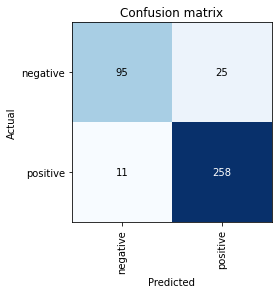

In [12]:
cm = interp.plot_confusion_matrix()

In [13]:
type(cm)

NoneType